#### Problem Statement: This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LarsCV,LassoLarsCV,LassoCV,ElasticNetCV,BayesianRidge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,BayesianRidge,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import joblib

#### Uploading dataset

In [2]:
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


### EDA

In [3]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

##### Input features: Runs (R), At Bats (AB), Hits(H), Doubles (2B), Triples (3B), Homeruns (HR), Walks (BB), Strikeouts (SO) , Stolen Bases (SB), Runs Allowed (RA), Earned Runs (ER), Earned Run Average (ERA), Shutouts (SHO), Saves (SV), Complete Games (CG) and Errors(E)
    
**Output: Number of predicted wins (W)**    

In [4]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (30, 17)


In [5]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: False


<AxesSubplot:>

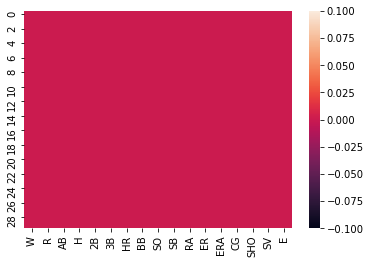

In [6]:
sns.heatmap(df.isnull())

###### No Null Values 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


###### All variables are numeric type.

In [8]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


##### Mean & Median of all columns are almost same.
*There is huge variance in quartile range of some columns which means there is possibility of outliers present* 

#### Checking correlation

In [9]:
df.corr()['W']

W      1.000000
R      0.430751
AB    -0.087947
H      0.037612
2B     0.427797
3B    -0.251118
HR     0.307407
BB     0.484342
SO     0.111850
SB    -0.157234
RA    -0.812952
ER    -0.809435
ERA   -0.819600
CG     0.080533
SHO    0.471805
SV     0.666530
E     -0.089485
Name: W, dtype: float64

#### use heatmap to check correlation on dataset

<AxesSubplot:>

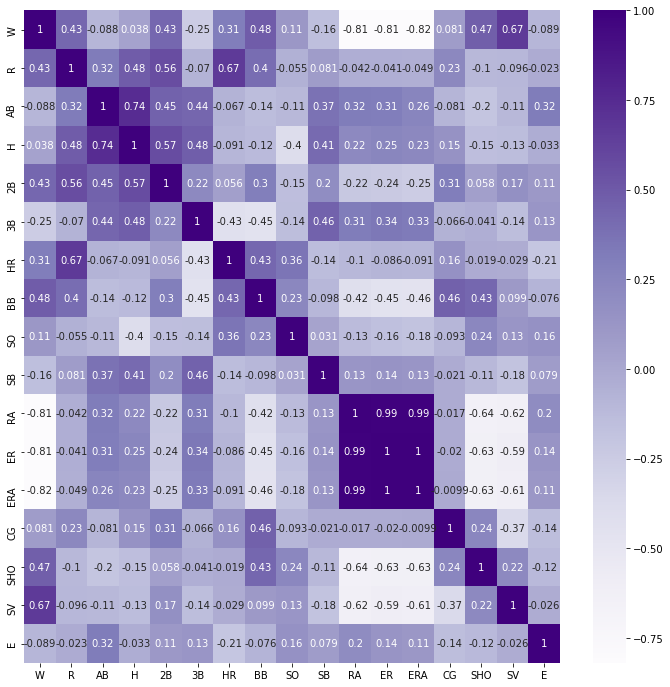

In [10]:
plt.figure(figsize=[12,12])
sns.heatmap(df.corr(),annot=True,cmap='Purples')

##### Many columns have very low correlation with Number of predicted wins (W).

##### SO,SB,AB,H,E,CG,3B has very low correlation

##### SV,SHO,BB,HR, R, 2B have postive correlation and rest have negative correlation

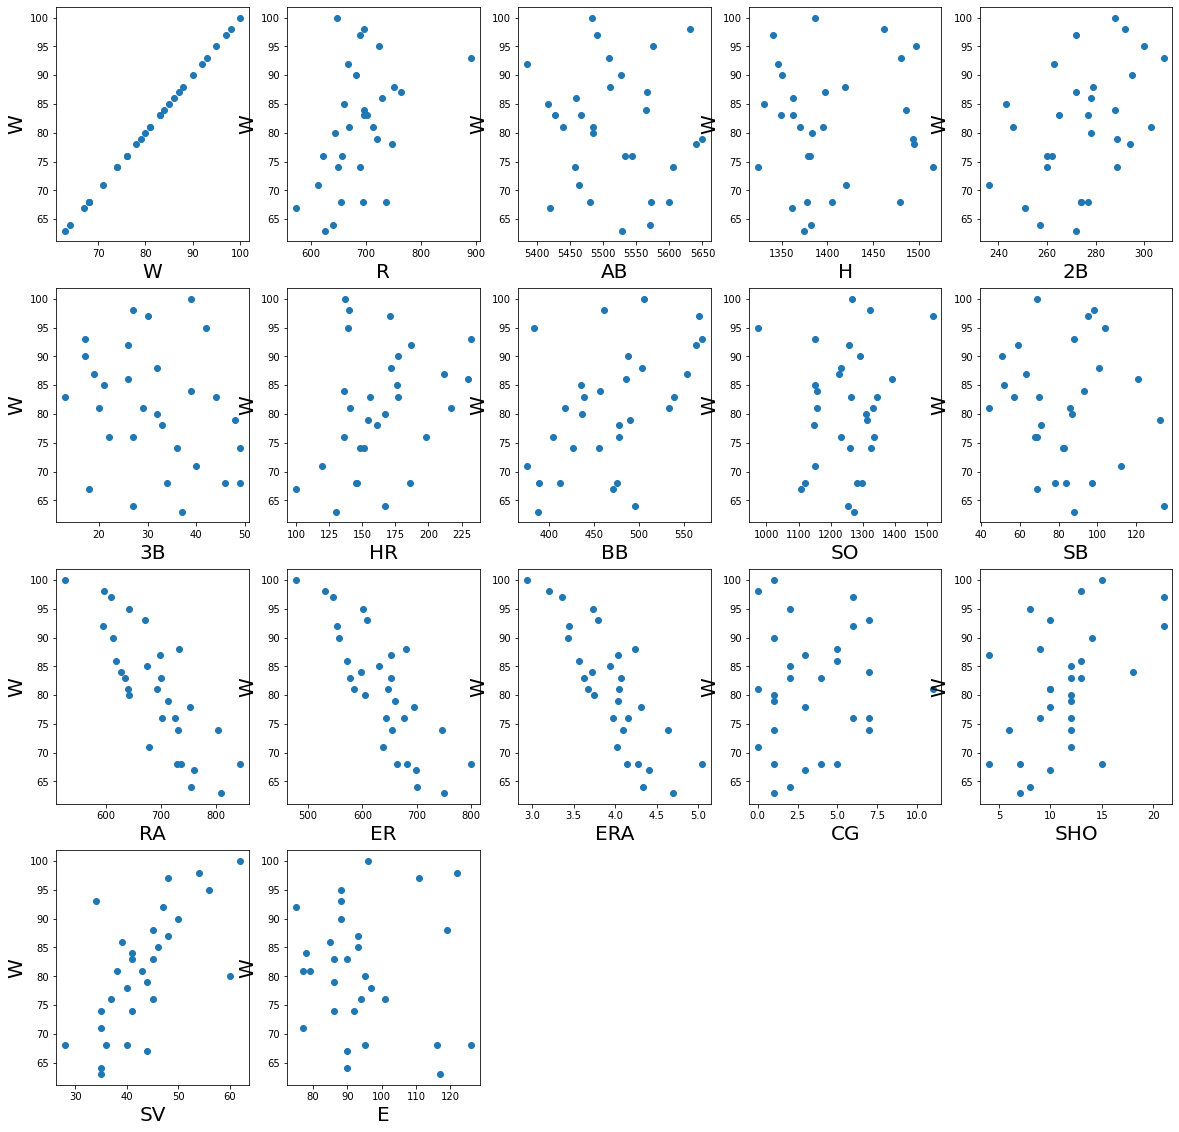

In [11]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for i in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(5,5,plotnumber)
        plt.scatter(df[i],df['W'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('W',fontsize=20)
    plotnumber+=1
plt.show()

##### SO,SB,AB,H,E,CG,3B do not have any linear relation with column W so they can be dropped.

In [12]:
df=df.drop(['CG','E','H','AB','SO','SB','3B'],axis=1)
df

,W,R,2B,HR,BB,RA,ER,ERA,SHO,SV
0,95,724,300,139,383,641,601,3.73,8,56
1,83,696,277,156,439,700,653,4.07,12,45
2,81,669,303,141,533,640,584,3.67,10,38
3,76,622,260,136,404,701,643,3.98,9,37
4,74,689,289,151,455,803,746,4.64,12,35
5,93,891,308,232,570,670,609,3.80,10,34
6,87,764,272,212,554,698,652,4.03,4,48
7,81,713,246,217,418,693,646,4.05,10,43
8,80,644,278,167,436,642,604,3.74,12,60
9,78,748,294,161,478,753,694,4.31,10,40


#### Check distribution plots

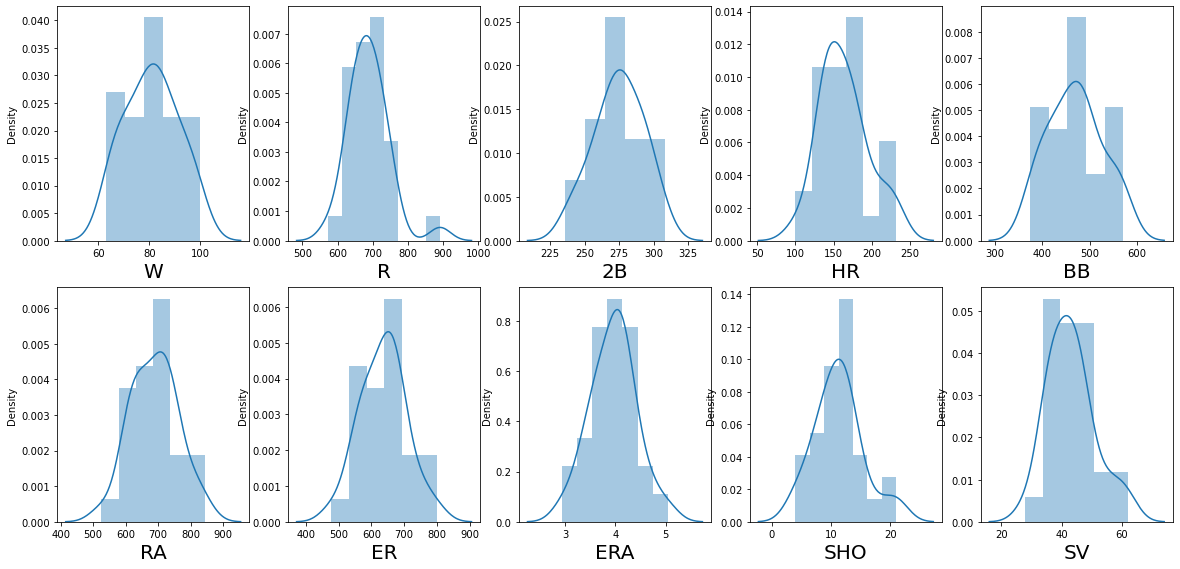

In [13]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=len(df.columns):
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

##### R,SHO,SV might have some outliers, rest all seem to have normal distribution.

#### Finding Outliers

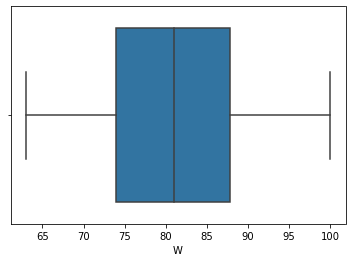

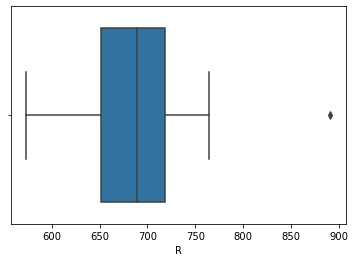

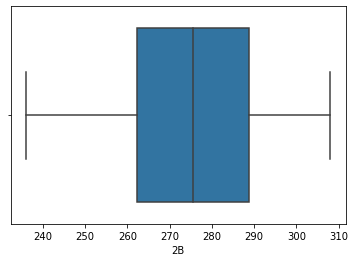

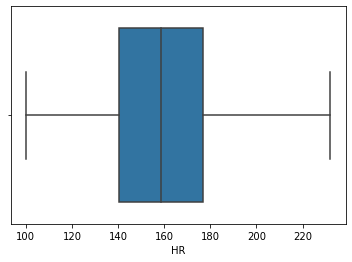

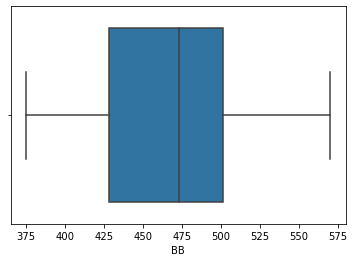

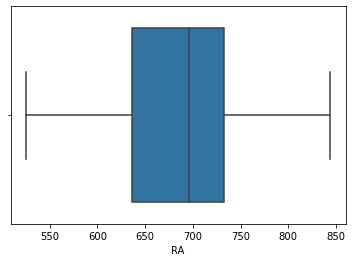

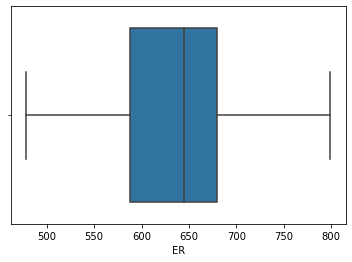

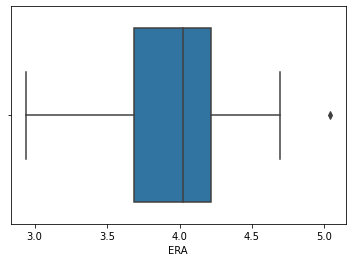

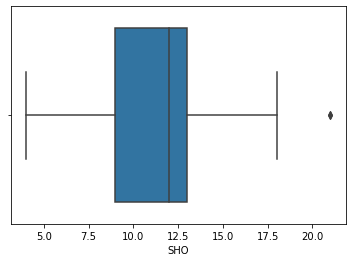

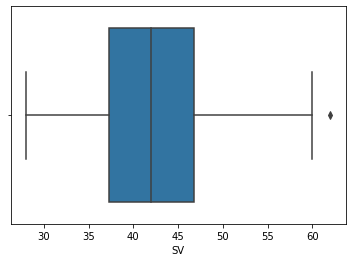

In [14]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

##### R, ERA, SHO,SV have outliers

#### remove outliers using z-score

In [15]:
z_scr=zscore(df)
print(df.shape)
df_new=df.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(30, 10)
(29, 10)


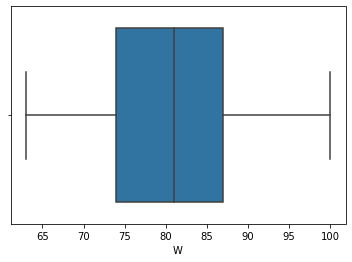

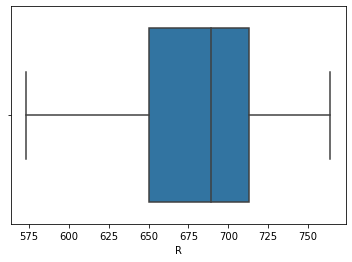

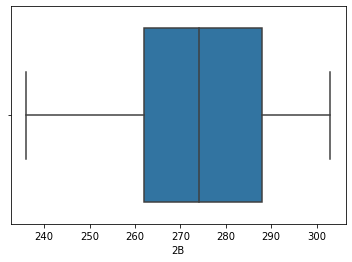

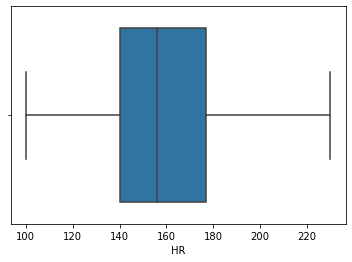

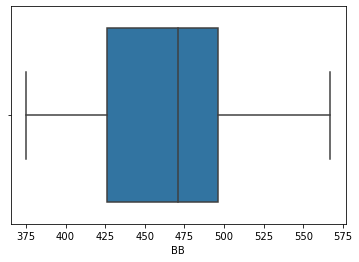

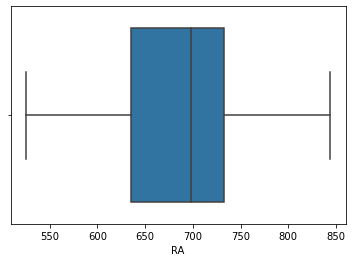

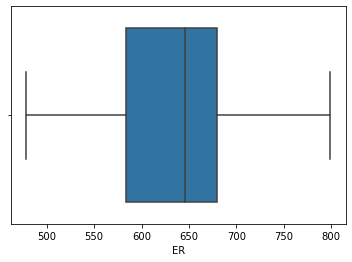

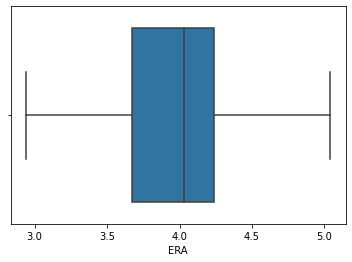

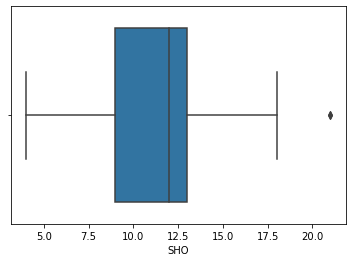

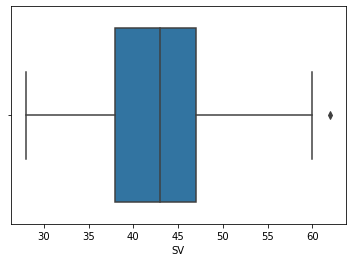

In [16]:
for i in df_new.columns:
    sns.boxplot(df_new[i])
    plt.show()

#### outlier is still present in SV and SHO

In [17]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(25, 10)

#### IQR is indicating loss more than 10% use Z-score only

In [18]:
y = df_new[['W']].values
x = df_new.drop(columns = ['W'])

##### Checking skewness

In [19]:
print(x.skew())

R     -0.215364
2B    -0.335304
HR     0.450862
BB     0.151193
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.526943
SV     0.627480
dtype: float64


In [20]:
print(len(x.skew().loc[x.skew()>0.55])) # Number of features having skewness more than 0.55

1


In [21]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [22]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))# Number of features having skewness more than 0.55

R     -0.215364
2B    -0.335304
HR     0.450862
BB     0.151193
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.526943
SV     0.280963
dtype: float64
0


##### No Biasing

#### Feature Engineering

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

#### Check multicolinearity

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1]) ]
vif

,Features,vif
0,R,2.959516
1,2B,2.275966
2,HR,2.658271
3,BB,1.973129
4,RA,91.496951
5,ER,427.708638
6,ERA,263.743288
7,SHO,2.393642
8,SV,2.357764


##### Multicollinearity only affects the coefficients and p-values, but it does not influence the model’s ability to predict the dependent variable.

###### ERA is derived from ER we can drop ERA

In [25]:
x = x.drop(columns = ['ERA'])
X_scaled = scaler.fit_transform(x)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1]) ]
vif

,Features,vif
0,R,2.959408
1,2B,2.132960
2,HR,2.571870
3,BB,1.969166
4,RA,81.161872
5,ER,77.247201
6,SHO,2.268974
7,SV,2.009896


##### RA is derived using earned runs ER. drop ER

In [26]:
x = x.drop(columns = ['ER'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
vif = pd.DataFrame()
vif["Features"] = x.columns
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1]) ]
vif

,Features,vif
0,R,2.902775
1,2B,2.116722
2,HR,2.486642
3,BB,1.628159
4,RA,3.167464
5,SHO,2.167450
6,SV,1.946389


#### PCA for  dimensionality-reduction 

In [27]:
for i in range(2,8):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X_scaled)
    print(i,sum(pca.explained_variance_ratio_))

2 0.6001363685716945
3 0.7626886623770233
4 0.8848468159892967
5 0.9482952113288587
6 0.9761685329240526
7 1.0000000000000002


###### Choosing 5 for max Data retention

In [28]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_scaled)

In [29]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,test_size=.30,random_state=i)
    mod= LarsCV()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.912865366183885 on random state 50


In [30]:
x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 5)
(9, 5)
(20, 1)
(9, 1)


#### 70% of the data (20 rows) will be available for training the model & 30% (9 rows) will be available for testing the model

### Model Building & Evaluation

In [44]:
models = [LarsCV(),LassoLarsCV(),LassoCV(),ElasticNetCV(),BayesianRidge(),GradientBoostingRegressor(),NuSVR(),LinearRegression(),Ridge(),RidgeCV(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),LinearSVR(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor(),LGBMRegressor(), XGBRFRegressor(),XGBRegressor()]

In [45]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 42,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print('----'*10)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('mae',mean_absolute_error(y_test, y_pred))
    print('rmse',np.sqrt(mean_squared_error(y_test, y_pred)))

----------------------------------------
LarsCV()
score 0.6160067142253529
r2 0.8299351461147771
diff 0.21392843188942423
mae 3.1529507728881305
rmse 4.047581284867519
----------------------------------------
LassoLarsCV()
score 0.6160067142253529
r2 0.8299351461147771
diff 0.21392843188942423
mae 3.1529507728881305
rmse 4.047581284867519
----------------------------------------
LassoCV()
score 0.6236590004841148
r2 0.8305862551418635
diff 0.20692725465774864
mae 3.159541205125189
rmse 4.039825584683967
----------------------------------------
ElasticNetCV()
score 0.6484049502946362
r2 0.8309810063926983
diff 0.18257605609806216
mae 3.296489551271191
rmse 4.035116237586809
----------------------------------------
BayesianRidge()
score 0.6550726987778022
r2 0.8284533758148571
diff 0.17338067703705495
mae 3.307651992077645
rmse 4.065176272910614
----------------------------------------
GradientBoostingRegressor()
score 0.28025800315612814
r2 0.7329204652031414
diff 0.4526624620470132
mae

In [46]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,test_size=.30,random_state=i)
    mod= BayesianRidge()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.9273692271540874 on random state 53


### Hyperparameter tuning

In [47]:
parameters={"n_iter":range(1,300),'compute_score':[True, False],'fit_intercept':[True, False]}
clf = GridSearchCV(BayesianRidge(), parameters, cv=5,scoring="r2")
clf.fit(principalComponents,y)
clf.best_params_

{'compute_score': True, 'fit_intercept': True, 'n_iter': 1}

In [49]:
x_train,x_test,y_train,y_test=train_test_split(principalComponents, y,random_state = 53,test_size=0.30,shuffle=True)
model=BayesianRidge(compute_score=True,fit_intercept=True,n_iter=1)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(model,x,y,cv=5)
print('cross val score',scores.mean())
print('std err',scores.std())

coeff of determination is: 0.8117848550603859
mean absolute error: 3.832033620974359
mean squared error: 20.076282126892174
root mean square error: 4.480656439283442
cross val score 0.3170069464207534
std err 0.7721103233910235


##### Observing the difference between actual values and predicted values

In [51]:
y_pred=model.predict(principalComponents)
data=x
data['WPred']=[round(i) for i in y_pred]
data['W']=y
data['differnce']=data['W']-data['WPred']
data

,R,2B,HR,BB,RA,SHO,SV,WPred,W,differnce
0,724,300,139,383,641,8,3.825862,88,95,7
1,696,277,156,439,700,12,3.556893,82,83,1
2,669,303,141,533,640,10,3.361975,83,81,-2
3,622,260,136,404,701,9,3.332222,73,76,3
4,689,289,151,455,803,12,3.271066,75,74,-1
6,764,272,212,554,698,4,3.634241,85,87,2
7,713,246,217,418,693,10,3.503398,80,81,1
8,644,278,167,436,642,12,3.914868,87,80,-7
9,748,294,161,478,753,10,3.419952,81,78,-3
10,751,279,172,503,733,9,3.556893,83,88,5


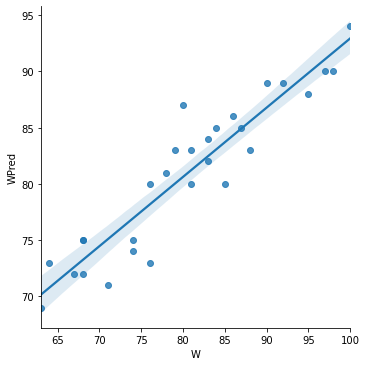

In [52]:
sns.lmplot(x='W',y='WPred',data=data,palette='rainbow')

#### Visualize a linear relationship as determined through regression line to see how actual & predicted datapoints are close 

<AxesSubplot:xlabel='WPred', ylabel='Density'>

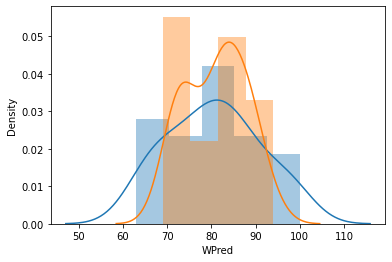

In [53]:
sns.distplot(data['W'])
sns.distplot(data['WPred'])

In [ ]:
Checking Distribution Plots